In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load the data
data = pd.read_csv('winequality-red.csv', delimiter=';')

In [19]:
# Remove rows with missing values
data = data.dropna()

In [20]:
# Separate features and target
X = data.drop('quality', axis=1)
y = data['quality']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.3900251439639545
R-squared Score: 0.40318034127962254


In [26]:
# Print coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')


fixed acidity: 0.02308533390927672
volatile acidity: -1.0013044340678143
citric acid: -0.14082146122412428
residual sugar: 0.006564311041477644
chlorides: -1.8065031490473724
free sulfur dioxide: 0.005627334387082961
total sulfur dioxide: -0.00364444893386906
density: -10.351593588830205
pH: -0.3936877323398666
sulphates: 0.8411716226093208
alcohol: 0.2818895674091908


In [27]:
# Visualizations
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Quality')

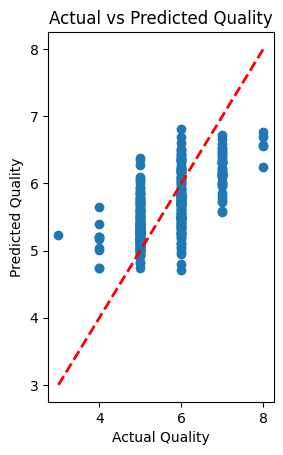

In [28]:
# 1. Actual vs Predicted
plt.subplot(121)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')

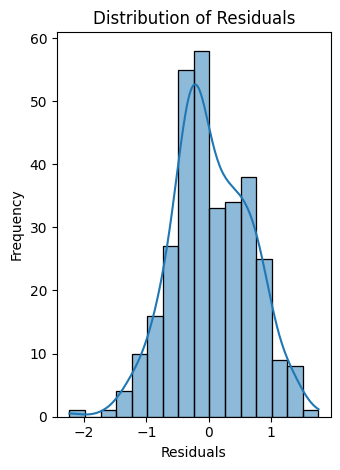

In [29]:
# 2. Residuals
plt.subplot(122)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

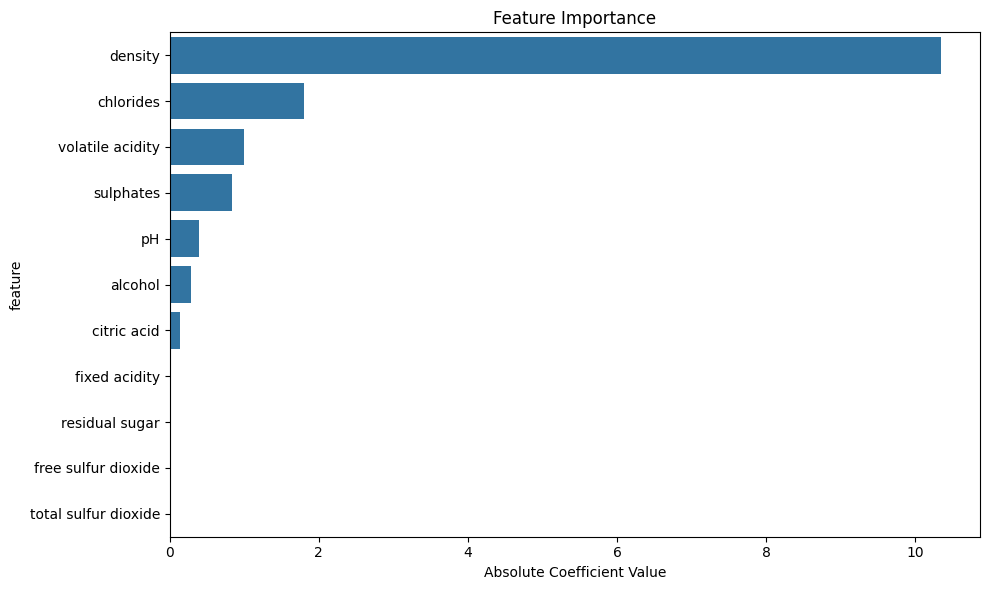

In [30]:
# 3. Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


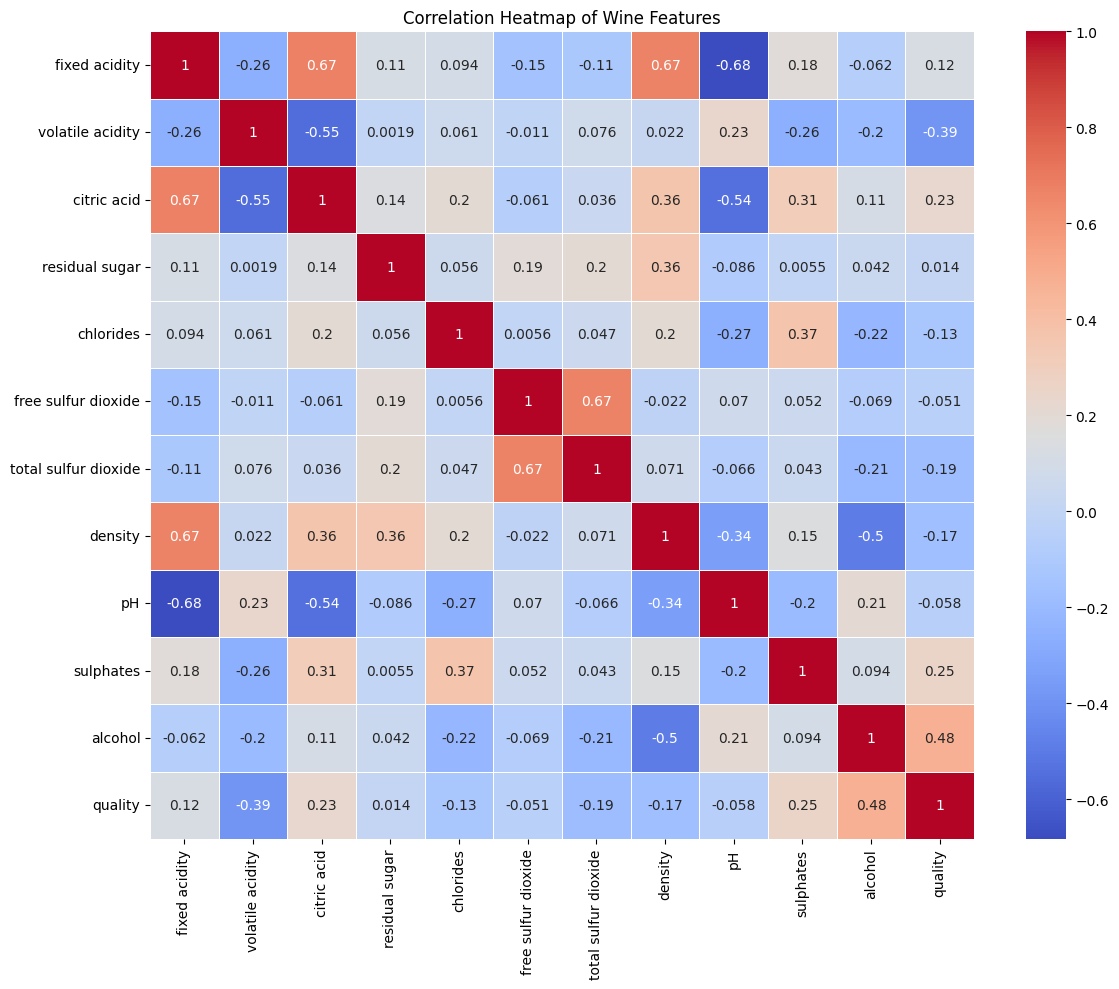

In [31]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.tight_layout()
plt.show()